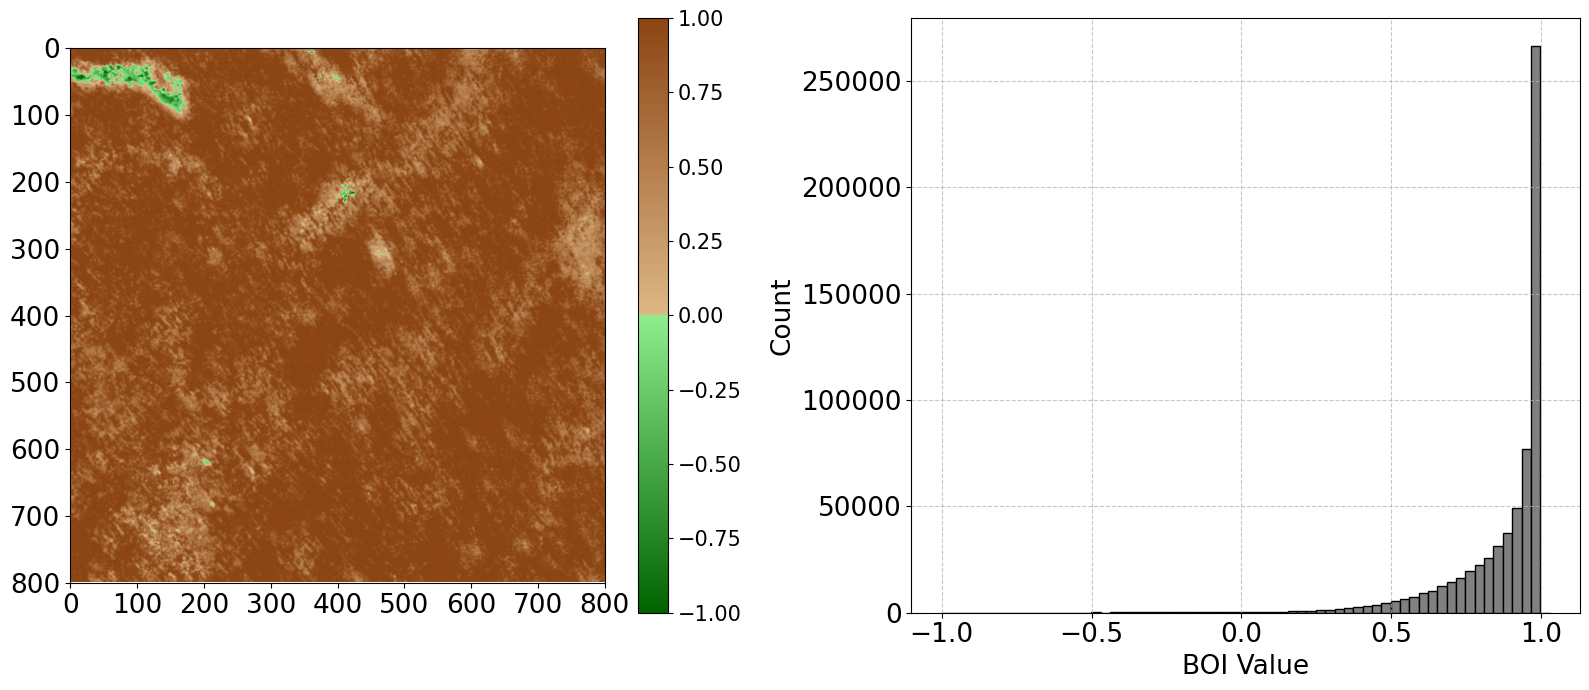

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the custom colormap with dark green to light green and light brown to saddlebrown
colors = [
    (0.0, (0.0, 0.39, 0.0)),      # Dark green at -1
    (0.5, (0.56, 0.93, 0.56)),    # Light green at 0
    (0.5, (0.87, 0.72, 0.53)),    # Light brown at 0
    (1.0, (0.545, 0.27, 0.075))   # SaddleBrown at 1
]
green_to_saddlebrown = LinearSegmentedColormap.from_list("GreenToSaddleBrown", colors)

# Load the images
image_plus = cv2.imread('45_aligned.png')
image_minus = cv2.imread('-45_aligned.png')

# Check if the images are loaded properly
if image_plus is None or image_minus is None:
    print("Error loading one or both images")
else:
    # Define the centered 800x800 region of interest (ROI)
    roi_size = 800
    height, width, _ = image_plus.shape
    start_x = (width - roi_size) // 2
    start_y = (height - roi_size) // 2

    # Crop the 800x800 centered ROI from both images
    image_plus_crop = image_plus[start_y:start_y + roi_size, start_x:start_x + roi_size]
    image_minus_crop = image_minus[start_y:start_y + roi_size, start_x:start_x + roi_size]

    # Split the images into their RGB components
    B_plus, G_plus, R_plus = cv2.split(image_plus_crop)
    B_minus, G_minus, R_minus = cv2.split(image_minus_crop)

    # Convert the Blue channels to float32 and shift the values to [1, 256]
    B_plus_float = B_plus.astype(np.float32) + 1
    B_minus_float = B_minus.astype(np.float32) + 1

    # Calculate the BOI using the formula
    BOI = (B_minus_float - B_plus_float) / (B_plus_float + B_minus_float)

    # Plotting the BOI map and histogram
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))

    # BOI Map
    im = axs[0].imshow(BOI, cmap=green_to_saddlebrown, vmin=-1, vmax=1)
    # axs[0].set_title('BOI Map', fontsize=18)
    # axs[0].set_xlabel('Pixel (X)', fontsize=14)
    # axs[0].set_ylabel('Pixel (Y)', fontsize=14)

    tick_interval = 100  # Tick every 100 pixels
    axs[0].set_xticks(np.arange(0, roi_size + 1, tick_interval))
    axs[0].set_yticks(np.arange(0, roi_size + 1, tick_interval))
    axs[0].tick_params(axis='both', which='major', labelsize=19)

    cbar = plt.colorbar(im, ax=axs[0])
    # cbar.set_label('BOI', fontsize=14)
    cbar.ax.tick_params(labelsize=15)

    # Histogram with bin width 0.0312
    bin_edges = np.arange(-1, 1 + 0.0312, 0.0312)
    axs[1].hist(BOI.flatten(), bins=bin_edges, color='gray', edgecolor='black')
    # axs[1].set_title('BOI Histogram', fontsize=18)
    axs[1].set_xlabel('BOI Value', fontsize=19)
    axs[1].set_ylabel('Count', fontsize=19)
    axs[1].tick_params(axis='both', which='major', labelsize=19)
    axs[1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('boi_centered_800x800.png', dpi=300)
    plt.show()
